# Analyzing Busiest Airport in USA

In [89]:
import pandas as pd, requests, io, networkx as nx, numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from operator import itemgetter
from networkx import community

In [90]:
url = 'http://opsahl.co.uk/tnet/datasets/USairport500.dl'

In [91]:
content = requests.get(url).content

In [92]:
full_data = pd.read_csv(io.StringIO(content.decode('utf-8')),delimiter='\n')

In [93]:
data = full_data[3:]
data.head()

,dl
3,1 111 68150
4,1 49 110902
5,1 283 72020
6,1 177 220192
7,1 72 164951


In [94]:
data = pd.DataFrame(data.dl.str.split(' ').to_list(),columns=['Source','Destination','Weight'])
data.head()

,Source,Destination,Weight
0,1,111,68150
1,1,49,110902
2,1,283,72020
3,1,177,220192
4,1,72,164951


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 3 columns):
Source         5960 non-null object
Destination    5960 non-null object
Weight         5960 non-null object
dtypes: object(3)
memory usage: 139.8+ KB


In [96]:
data.Source = data.Source.astype(int)
data.Destination = data.Destination.astype(int)
data.Weight = data.Weight.astype(int)

In [97]:
nodes = sorted(data.Source.unique())
edges = [(j,l) for i,j in enumerate (data.Source) for k,l in enumerate (data.Destination) if i==k]
weighted_edges = [tuple(i) for i in data.values]

In [98]:
G= nx.DiGraph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(weighted_edges)
G_undirected = nx.Graph(G)

In [99]:
len(G.nodes),len(G.edges)

(500, 5960)

In [100]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 500
Number of edges: 5960
Average in degree:  11.9200
Average out degree:  11.9200


In [101]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.023887775551102206


In [102]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)
#  nodes that already have lots of connections are likely to be part of these enclosed triangles
# Because the graph is not very dense, there are fewer possible triangles to begin with, which may result in slightly higher transitivity

Triadic closure: 0.35138176339328286


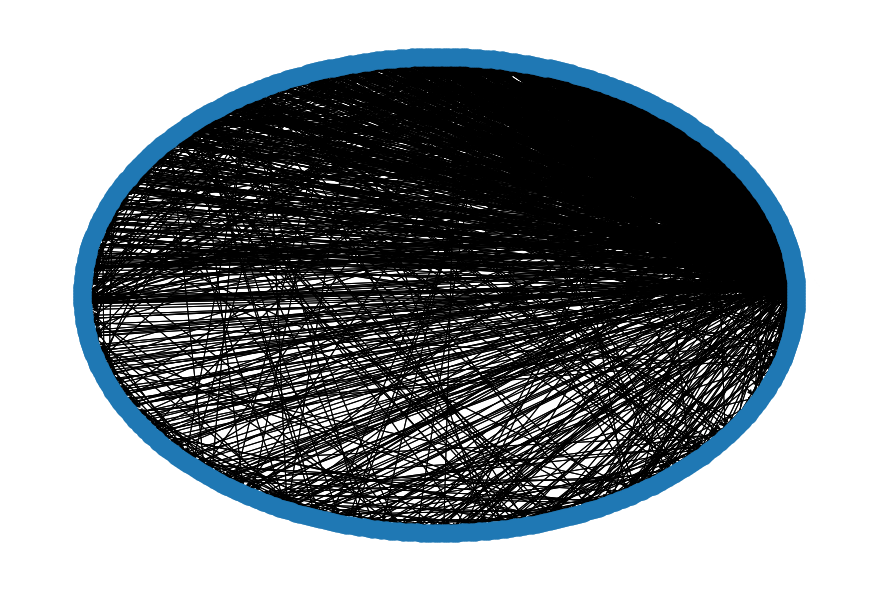

In [103]:
nx.draw(G,pos=nx.circular_layout(G))

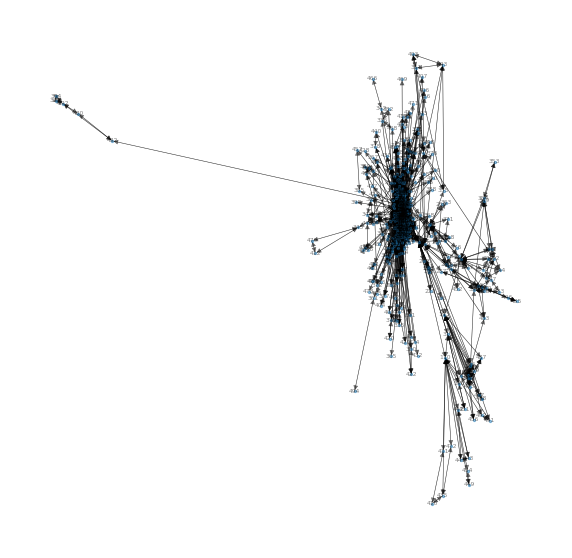

In [104]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
nx.draw_networkx(G, ax=ax, node_size=5,font_size=6, alpha=.5,width=.5)
ax.set_axis_off()
# we can infer that top 500 airports are all connected by some means. also few of them are less densly connected.

# Connectivity

In [105]:
# We can infer that its very strongly connected
nx.is_strongly_connected(G)

True

In [106]:
# only one strongly connected component
nx.number_strongly_connected_components(G)

1

In [107]:
# have only one week connection. can be verified through visualization as well
nx.number_weakly_connected_components(G)

1

In [108]:
# has one attracting component
nx.number_attracting_components(G)

1

# Cutvertices or Cutnodes

In [109]:
print('Number of cutvertices in our graph is : ',len(list(nx.articulation_points(G_undirected))))
print()
print(sorted(list(nx.articulation_points(G_undirected))))

Number of cutvertices in our graph is :  37

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 23, 32, 33, 34, 37, 49, 56, 109, 115, 122, 149, 170, 285, 287, 292, 298, 342, 345, 361, 482]


In [110]:
nx.subgraph(G_undirected,sorted(list(nx.articulation_points(G_undirected))))

In [111]:
bicomponents = list(nx.biconnected_components(G_undirected))
len(bicomponents)

100

In [112]:
Gc = max(nx.biconnected_components(G_undirected), key=len)
len(Gc)

371

# Analyzing various centrality measures

### Node Degree Centrality Measure

In [113]:
degree_dict = dict(G.degree(G.nodes()))
node_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 Airports by node degree centrality is as follows:")
for d in node_degree[:10]:
    print(d)

Top 10 Airports by node degree centrality is as follows:
(1, 290)
(2, 272)
(3, 264)
(7, 260)
(6, 244)
(8, 228)
(18, 228)
(21, 220)
(11, 218)
(10, 196)


In [114]:
print("Least 10 Airports by node degree centrality is as follows:")
for d in node_degree[-11:-1]:
    print(d)

Least 10 Airports by node degree centrality is as follows:
(473, 2)
(474, 2)
(475, 2)
(477, 2)
(478, 2)
(481, 2)
(486, 2)
(490, 2)
(494, 2)
(495, 2)


In [115]:
deg_20 = [j for i,j in node_degree if j<20]
len(deg_20)

377

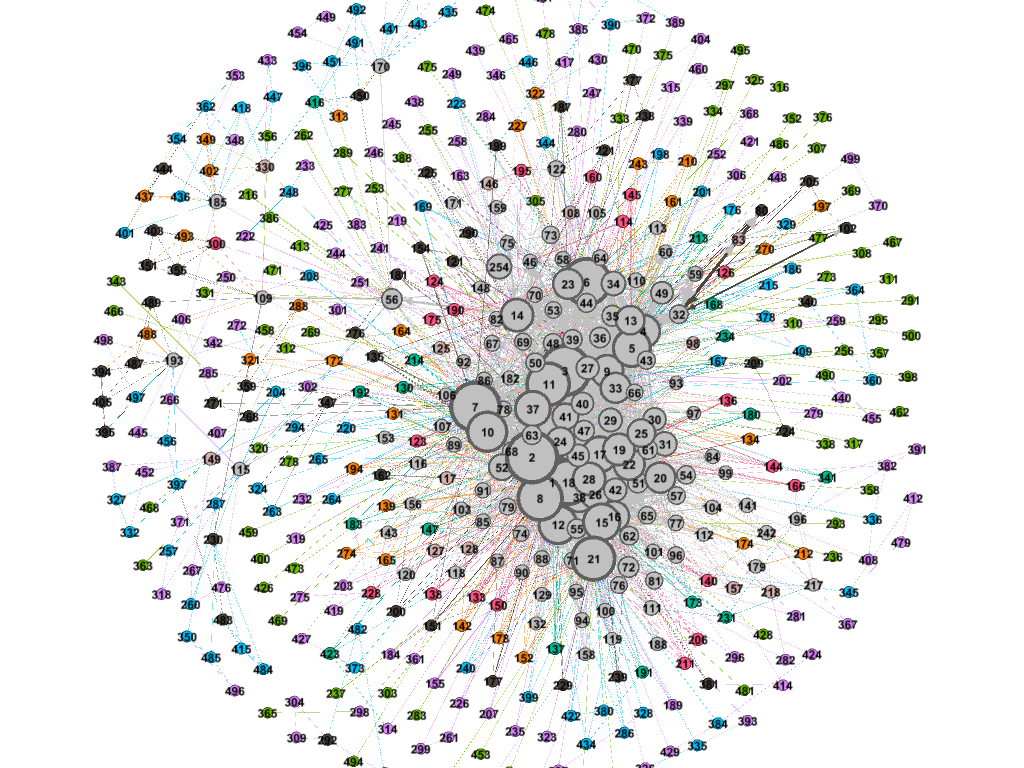

In [116]:
from IPython.display import Image
Image(filename='./snips/node degree.png')

### Betweenness Centrality Measure

In [117]:
betweenness_dict = nx.betweenness_centrality(G) 
node_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 Airports by betweenness centrality is as follows:")
for b in node_betweenness[:10]:
    print(b)

Top 10 Airports by betweenness centrality is as follows:
(56, 0.2155214651802839)
(7, 0.13685034955288253)
(6, 0.13180225203714338)
(14, 0.12746805876933892)
(3, 0.09430747237445153)
(1, 0.09036545291975494)
(21, 0.08602375908069694)
(2, 0.059676613493799296)
(10, 0.05753145879957776)
(8, 0.05215815371927588)


In [118]:
print("Least 10 Airports by betweenness centrality is as follows:")
for b in node_betweenness[-11:]:
    print(b)

Least 10 Airports by betweenness centrality is as follows:
(480, 0.0)
(481, 0.0)
(484, 0.0)
(486, 0.0)
(490, 0.0)
(494, 0.0)
(495, 0.0)
(496, 0.0)
(498, 0.0)
(499, 0.0)
(500, 0.0)


In [119]:
top_betweenness = node_betweenness[:10]

for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] 
    temp = 0
    if len(str(tb[0])) == 1: temp = format(tb[0], '02')
    else: temp = tb[0]
    print("Airport:", temp, "| Betweenness Centrality:", round(tb[1],4), "| Degree:", degree)

Airport: 56 | Betweenness Centrality: 0.2155 | Degree: 68
Airport: 07 | Betweenness Centrality: 0.1369 | Degree: 260
Airport: 06 | Betweenness Centrality: 0.1318 | Degree: 244
Airport: 14 | Betweenness Centrality: 0.1275 | Degree: 150
Airport: 03 | Betweenness Centrality: 0.0943 | Degree: 264
Airport: 01 | Betweenness Centrality: 0.0904 | Degree: 290
Airport: 21 | Betweenness Centrality: 0.086 | Degree: 220
Airport: 02 | Betweenness Centrality: 0.0597 | Degree: 272
Airport: 10 | Betweenness Centrality: 0.0575 | Degree: 196
Airport: 08 | Betweenness Centrality: 0.0522 | Degree: 228


### Eigenvector Centrality Measure

In [120]:
eigenvector_dict = nx.eigenvector_centrality(G) 
node_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 Airports by eigenvector centrality is as follows:")
for b in node_eigenvector[:10]:
    print(b)

Top 10 Airports by eigenvector centrality is as follows:
(1, 0.19076801166001292)
(2, 0.1870853987823848)
(3, 0.17822096317485506)
(18, 0.17727093382439213)
(8, 0.17164277616103318)
(7, 0.16875642833424054)
(11, 0.16470891486346675)
(17, 0.15765411989902905)
(10, 0.15719854558242122)
(21, 0.15556935168381597)


In [121]:
top_eigenvector = node_eigenvector[:10]

for tb in top_eigenvector: 
    degree = degree_dict[tb[0]] 
    temp = 0
    if len(str(tb[0])) == 1: temp = format(tb[0], '02')
    else: temp = tb[0]
    print("Airport:", temp, "| Eigenvector Centrality:", round(tb[1],4), "| Degree:", degree)

Airport: 01 | Eigenvector Centrality: 0.1908 | Degree: 290
Airport: 02 | Eigenvector Centrality: 0.1871 | Degree: 272
Airport: 03 | Eigenvector Centrality: 0.1782 | Degree: 264
Airport: 18 | Eigenvector Centrality: 0.1773 | Degree: 228
Airport: 08 | Eigenvector Centrality: 0.1716 | Degree: 228
Airport: 07 | Eigenvector Centrality: 0.1688 | Degree: 260
Airport: 11 | Eigenvector Centrality: 0.1647 | Degree: 218
Airport: 17 | Eigenvector Centrality: 0.1577 | Degree: 170
Airport: 10 | Eigenvector Centrality: 0.1572 | Degree: 196
Airport: 21 | Eigenvector Centrality: 0.1556 | Degree: 220


### Closeness Centrality Measure

In [122]:
closeness_dict = nx.closeness_centrality(G)
node_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 Airports by closeness centrality is as follows:")
for b in node_closeness[:10]:
    print(b)

Top 10 Airports by closeness centrality is as follows:
(7, 0.5308510638297872)
(1, 0.5269271383315733)
(2, 0.5247108307045215)
(3, 0.5219665271966527)
(6, 0.5192507804370448)
(8, 0.5097037793667007)
(11, 0.5091836734693878)
(14, 0.5071138211382114)
(10, 0.5035317860746721)
(17, 0.4960238568588469)


In [123]:
top_closeness = node_closeness[:10]

#Then find and print their degree
for tb in top_closeness: 
    degree = degree_dict[tb[0]] 
    temp = 0
    if len(str(tb[0])) == 1: temp = format(tb[0], '02')
    else: temp = tb[0]
    print("Airport:", temp, "| Closeness Centrality:", round(tb[1],4), "| Degree:", degree)

Airport: 07 | Closeness Centrality: 0.5309 | Degree: 260
Airport: 01 | Closeness Centrality: 0.5269 | Degree: 290
Airport: 02 | Closeness Centrality: 0.5247 | Degree: 272
Airport: 03 | Closeness Centrality: 0.522 | Degree: 264
Airport: 06 | Closeness Centrality: 0.5193 | Degree: 244
Airport: 08 | Closeness Centrality: 0.5097 | Degree: 228
Airport: 11 | Closeness Centrality: 0.5092 | Degree: 218
Airport: 14 | Closeness Centrality: 0.5071 | Degree: 150
Airport: 10 | Closeness Centrality: 0.5035 | Degree: 196
Airport: 17 | Closeness Centrality: 0.496 | Degree: 170


# Shortest paths for non connected airports

In [124]:
no_connectivity =  [i for i,j in node_betweenness if j==0]
len(no_connectivity)

222

In [125]:
print('Airports with no any direct connection : ',len(no_connectivity))
print()
print(no_connectivity)

Airports with no any direct connection :  222

[80, 98, 102, 117, 123, 128, 130, 131, 134, 135, 137, 139, 140, 142, 147, 150, 151, 152, 155, 158, 161, 162, 163, 164, 168, 169, 174, 175, 176, 178, 180, 184, 186, 189, 198, 200, 201, 202, 203, 204, 205, 207, 214, 215, 216, 219, 220, 221, 222, 226, 229, 232, 233, 234, 235, 236, 237, 239, 240, 241, 244, 245, 246, 247, 249, 251, 252, 253, 255, 256, 258, 259, 261, 262, 263, 264, 265, 269, 272, 273, 277, 278, 279, 280, 281, 283, 284, 286, 289, 290, 291, 293, 295, 296, 297, 299, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 315, 316, 317, 318, 319, 320, 323, 324, 325, 326, 329, 331, 333, 334, 337, 338, 339, 343, 344, 346, 348, 352, 356, 357, 358, 363, 365, 366, 367, 368, 369, 370, 371, 372, 374, 375, 376, 380, 382, 383, 386, 387, 388, 391, 393, 396, 398, 399, 400, 401, 404, 407, 408, 412, 413, 415, 417, 418, 419, 422, 424, 425, 426, 428, 429, 430, 431, 432, 433, 438, 439, 440, 441, 442, 443, 445, 448, 449, 451, 452, 453, 454, 455,

In [126]:
from collections import defaultdict
no_connectivity_shortest_path = defaultdict()
for i in no_connectivity:
    for j in no_connectivity:
        if i != j:  no_connectivity_shortest_path [str(i)+' -> '+str(j)] = nx.shortest_path(G, i, j)

In [127]:
no_connectivity_shortest_path

defaultdict(None,
            {'80 -> 98': [80, 4, 28, 98],
             '80 -> 102': [80, 32, 102],
             '80 -> 117': [80, 4, 12, 117],
             '80 -> 123': [80, 4, 12, 123],
             '80 -> 128': [80, 4, 38, 128],
             '80 -> 130': [80, 4, 11, 130],
             '80 -> 131': [80, 4, 12, 131],
             '80 -> 134': [80, 4, 31, 134],
             '80 -> 135': [80, 4, 6, 135],
             '80 -> 137': [80, 4, 12, 137],
             '80 -> 139': [80, 4, 12, 139],
             '80 -> 140': [80, 4, 12, 140],
             '80 -> 142': [80, 4, 18, 142],
             '80 -> 147': [80, 4, 41, 147],
             '80 -> 150': [80, 4, 18, 150],
             '80 -> 151': [80, 4, 8, 151],
             '80 -> 152': [80, 4, 18, 152],
             '80 -> 155': [80, 4, 1, 155],
             '80 -> 158': [80, 4, 12, 158],
             '80 -> 161': [80, 4, 161],
             '80 -> 162': [80, 4, 12, 162],
             '80 -> 163': [80, 32, 3, 163],
             '80 -> 164': 

# Shortest path to travel for each airport

In [145]:
shortest_path = defaultdict()
for i in G.nodes():
    for j in G.nodes():
        if i != j:  shortest_path [str(i)+' -> '+str(j)] = nx.shortest_path(G, i, j)
shortest_path

defaultdict(None,
            {'1 -> 2': [1, 2],
             '1 -> 3': [1, 3],
             '1 -> 4': [1, 4],
             '1 -> 5': [1, 5],
             '1 -> 6': [1, 6],
             '1 -> 7': [1, 7],
             '1 -> 8': [1, 8],
             '1 -> 9': [1, 9],
             '1 -> 10': [1, 10],
             '1 -> 11': [1, 11],
             '1 -> 12': [1, 12],
             '1 -> 13': [1, 13],
             '1 -> 14': [1, 14],
             '1 -> 15': [1, 15],
             '1 -> 16': [1, 16],
             '1 -> 17': [1, 17],
             '1 -> 18': [1, 18],
             '1 -> 19': [1, 19],
             '1 -> 20': [1, 20],
             '1 -> 21': [1, 21],
             '1 -> 22': [1, 22],
             '1 -> 23': [1, 23],
             '1 -> 24': [1, 24],
             '1 -> 25': [1, 25],
             '1 -> 26': [1, 26],
             '1 -> 27': [1, 27],
             '1 -> 28': [1, 28],
             '1 -> 29': [1, 29],
             '1 -> 30': [1, 30],
             '1 -> 31': [1, 31],
        

# Analyzing In and Out Degree

In [128]:
in_degree = sorted(list(G.in_degree()), key=lambda x: x[1],reverse=True)

print("Top 10 Airports by In-Degree is as follows:")
for b in in_degree[:10]:
    print(b)

Top 10 Airports by In-Degree is as follows:
(1, 145)
(2, 136)
(3, 132)
(7, 130)
(6, 122)
(8, 114)
(18, 114)
(21, 110)
(11, 109)
(10, 98)


In [139]:
low_indegree= [i for i,j in in_degree if j<=10]
len(low_indegree)

381

In [129]:
out_degree = sorted(list(G.out_degree()), key=lambda x: x[1],reverse=True)

print("Top 10 Airports by Out-Degree is as follows:")
for b in out_degree[:10]:
    print(b)

Top 10 Airports by Out-Degree is as follows:
(1, 145)
(2, 136)
(3, 132)
(7, 130)
(6, 122)
(8, 114)
(18, 114)
(21, 110)
(11, 109)
(10, 98)


In [140]:
low_outdegree= [i for i,j in out_degree if j<=10]
len(low_outdegree)

381

In [130]:
# clustering = nx.clustering(G)
# sorted(clustering.items(), key=lambda x: x[1])

# Community detection with modularity

In [131]:
communities = community.greedy_modularity_communities(G)

modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

In [132]:
len(list(nx.find_cliques(G_undirected)))

1044

In [134]:
from community import community_louvain
partition=community_louvain.best_partition(G_undirected, weight='MsgCount')
print('Completed Louvain algorithm .. . . ' )
values=[partition.get(node) for node in G.nodes()]
list_com=partition.values()

# Creating a dictionary like {community_number:list_of_participants}
dict_nodes={}

# Populating the dictionary with items
for each_item in partition.items():
    community_num=each_item[1]
    community_node=each_item[0]
    if community_num in dict_nodes:
        value=str(dict_nodes.get(community_num)) + ' | ' + str(community_node)
        dict_nodes.update({community_num:value})
    else:
        dict_nodes.update({community_num:community_node})

# Creating a dataframe from the diet, and getting the output into excel
community_df=pd.DataFrame.from_dict(dict_nodes, orient='index',columns=['Members'])
community_df.index.rename('Community_Num' , inplace=True)
community_df.to_csv('Community_List_snippet1.csv')

Completed Louvain algorithm .. . . 


In [135]:
pd.set_option('display.width', 1000)
community_df

,Members
Community_Num,
0,1 | 3 | 11 | 12 | 37 | 39 | 46 | 48 | 50 | 64 ...
1,2 | 7 | 10 | 52 | 66 | 85 | 86 | 89 | 106 | 11...
2,4 | 5 | 6 | 9 | 13 | 14 | 23 | 27 | 32 | 33 | ...
3,8 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 24...
4,56 | 109 | 170 | 185 | 193 | 216 | 222 | 230 |...
5,115 | 149 | 204 | 250 | 257 | 260 | 266 | 267 ...
6,292 | 304 | 309 | 480 | 482
7,298 | 365
8,345 | 412 | 479


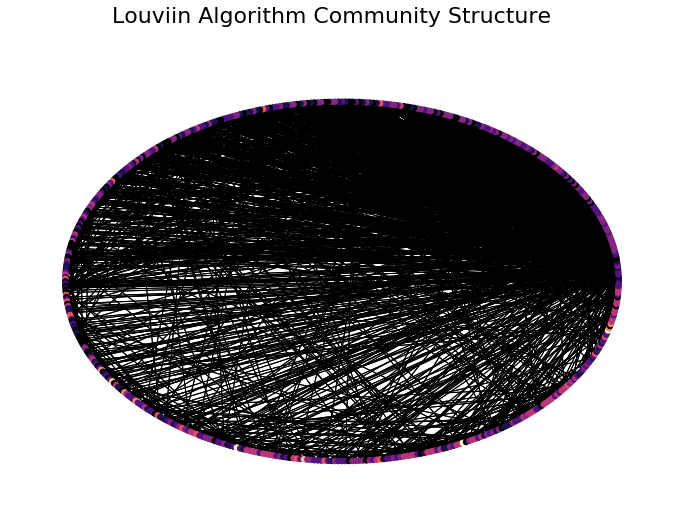

In [136]:
# Now we try to obtain the color coded graph for each community
nx.draw_networkx(G, pos = nx.circular_layout(G), cmap=plt.get_cmap('magma'), node_color=values,node_size=30, with_labels=False)
plt.suptitle('Louviin Algorithm Community Structure',fontsize=22)
plt.box(on=None)
plt.axis('off')
plt.savefig('louvain_2.png',dpi=400, bbox_inches='tight')
plt.show()